In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
pd.set_option('display.max_row', None)
pd.set_option('display.max_columns', None)

In [3]:
df = pd.read_csv('energydata_complete.csv', skipinitialspace= True)
df.head()

,date,Appliances,lights,T1,RH_1,T2,RH_2,T3,RH_3,T4,RH_4,T5,RH_5,T6,RH_6,T7,RH_7,T8,RH_8,T9,RH_9,T_out,Press_mm_hg,RH_out,Windspeed,Visibility,Tdewpoint,rv1,rv2
0,2016-01-11 17:00:00,60,30,19.89,47.596667,19.2,44.790000,19.79,44.730000,19.000000,45.566667,17.166667,55.20,7.026667,84.256667,17.200000,41.626667,18.2,48.900000,17.033333,45.53,6.600000,733.5,92.0,7.000000,63.000000,5.3,13.275433,13.275433
1,2016-01-11 17:10:00,60,30,19.89,46.693333,19.2,44.722500,19.79,44.790000,19.000000,45.992500,17.166667,55.20,6.833333,84.063333,17.200000,41.560000,18.2,48.863333,17.066667,45.56,6.483333,733.6,92.0,6.666667,59.166667,5.2,18.606195,18.606195
2,2016-01-11 17:20:00,50,30,19.89,46.300000,19.2,44.626667,19.79,44.933333,18.926667,45.890000,17.166667,55.09,6.560000,83.156667,17.200000,41.433333,18.2,48.730000,17.000000,45.50,6.366667,733.7,92.0,6.333333,55.333333,5.1,28.642668,28.642668
3,2016-01-11 17:30:00,50,40,19.89,46.066667,19.2,44.590000,19.79,45.000000,18.890000,45.723333,17.166667,55.09,6.433333,83.423333,17.133333,41.290000,18.1,48.590000,17.000000,45.40,6.250000,733.8,92.0,6.000000,51.500000,5.0,45.410389,45.410389
4,2016-01-11 17:40:00,60,40,19.89,46.333333,19.2,44.530000,19.79,45.000000,18.890000,45.530000,17.200000,55.09,6.366667,84.893333,17.200000,41.230000,18.1,48.590000,17.000000,45.40,6.133333,733.9,92.0,5.666667,47.666667,4.9,10.084097,10.084097


In [4]:
df.shape

(19735, 29)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19735 entries, 0 to 19734
Data columns (total 29 columns):
date           19735 non-null object
Appliances     19735 non-null int64
lights         19735 non-null int64
T1             19735 non-null float64
RH_1           19735 non-null float64
T2             19735 non-null float64
RH_2           19735 non-null float64
T3             19735 non-null float64
RH_3           19735 non-null float64
T4             19735 non-null float64
RH_4           19735 non-null float64
T5             19735 non-null float64
RH_5           19735 non-null float64
T6             19735 non-null float64
RH_6           19735 non-null float64
T7             19735 non-null float64
RH_7           19735 non-null float64
T8             19735 non-null float64
RH_8           19735 non-null float64
T9             19735 non-null float64
RH_9           19735 non-null float64
T_out          19735 non-null float64
Press_mm_hg    19735 non-null float64
RH_out         19735 n

In [6]:
df.isnull().sum()

date           0
Appliances     0
lights         0
T1             0
RH_1           0
T2             0
RH_2           0
T3             0
RH_3           0
T4             0
RH_4           0
T5             0
RH_5           0
T6             0
RH_6           0
T7             0
RH_7           0
T8             0
RH_8           0
T9             0
RH_9           0
T_out          0
Press_mm_hg    0
RH_out         0
Windspeed      0
Visibility     0
Tdewpoint      0
rv1            0
rv2            0
dtype: int64

In [7]:
rv1_values = set(df['rv1'].unique())
df['exists'] = df['rv2'].map(lambda x: True if x in rv1_values else False)
df.drop('exists', axis=1, inplace= True)

In [8]:
df['date'] = pd.to_datetime(df['date'])

In [9]:
df['year'] = df['date'].apply(lambda x:x.year )
df['month'] = df['date'].apply(lambda x:x.month )
df['day'] = df['date'].apply(lambda x:x.day )
df['hour'] = df['date'].apply(lambda x:x.hour )
df['min'] = df['date'].apply(lambda x:x.minute )
df['sec'] = df['date'].apply(lambda x:x.second )



In [10]:
df.head()

,date,Appliances,lights,T1,RH_1,T2,RH_2,T3,RH_3,T4,RH_4,T5,RH_5,T6,RH_6,T7,RH_7,T8,RH_8,T9,RH_9,T_out,Press_mm_hg,RH_out,Windspeed,Visibility,Tdewpoint,rv1,rv2,year,month,day,hour,min,sec
0,2016-01-11 17:00:00,60,30,19.89,47.596667,19.2,44.790000,19.79,44.730000,19.000000,45.566667,17.166667,55.20,7.026667,84.256667,17.200000,41.626667,18.2,48.900000,17.033333,45.53,6.600000,733.5,92.0,7.000000,63.000000,5.3,13.275433,13.275433,2016,1,11,17,0,0
1,2016-01-11 17:10:00,60,30,19.89,46.693333,19.2,44.722500,19.79,44.790000,19.000000,45.992500,17.166667,55.20,6.833333,84.063333,17.200000,41.560000,18.2,48.863333,17.066667,45.56,6.483333,733.6,92.0,6.666667,59.166667,5.2,18.606195,18.606195,2016,1,11,17,10,0
2,2016-01-11 17:20:00,50,30,19.89,46.300000,19.2,44.626667,19.79,44.933333,18.926667,45.890000,17.166667,55.09,6.560000,83.156667,17.200000,41.433333,18.2,48.730000,17.000000,45.50,6.366667,733.7,92.0,6.333333,55.333333,5.1,28.642668,28.642668,2016,1,11,17,20,0
3,2016-01-11 17:30:00,50,40,19.89,46.066667,19.2,44.590000,19.79,45.000000,18.890000,45.723333,17.166667,55.09,6.433333,83.423333,17.133333,41.290000,18.1,48.590000,17.000000,45.40,6.250000,733.8,92.0,6.000000,51.500000,5.0,45.410389,45.410389,2016,1,11,17,30,0
4,2016-01-11 17:40:00,60,40,19.89,46.333333,19.2,44.530000,19.79,45.000000,18.890000,45.530000,17.200000,55.09,6.366667,84.893333,17.200000,41.230000,18.1,48.590000,17.000000,45.40,6.133333,733.9,92.0,5.666667,47.666667,4.9,10.084097,10.084097,2016,1,11,17,40,0


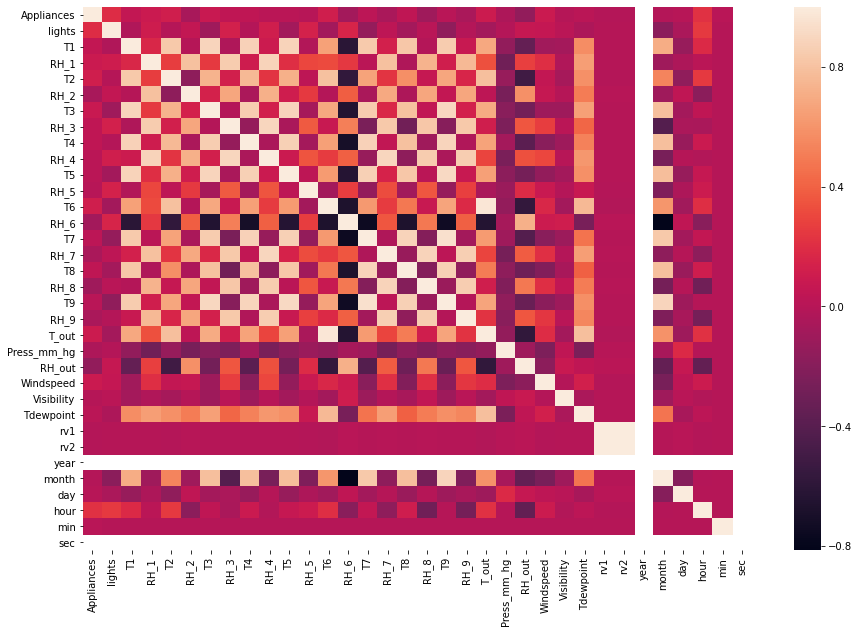

In [11]:
plt.figure(figsize=(15,10))
sns.heatmap(df.corr())

In [12]:
df.drop(['date', 'year', 'sec', 'rv2'], axis=1, inplace= True)

In [13]:
X = df.drop('rv1', axis=1)
y = df['rv1']

In [14]:
from sklearn.model_selection import train_test_split, RandomizedSearchCV

In [15]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=101)

In [16]:
from sklearn.ensemble import RandomForestRegressor
from scipy.stats import uniform as sp_randfloat, randint as sp_randint

model = RandomForestRegressor()
parameters = {
             'n_estimators': sp_randint(100, 1000),
             'max_depth': sp_randint(4,10)}

In [17]:
randm= RandomizedSearchCV( model, param_distributions =parameters, cv=2, n_iter= 10, n_jobs=-1,verbose =1)
randm.fit(X_train, y_train)

Fitting 2 folds for each of 10 candidates, totalling 20 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  20 out of  20 | elapsed:  9.4min finished


RandomizedSearchCV(cv=2, estimator=RandomForestRegressor(), n_jobs=-1,
                   param_distributions={'max_depth': <scipy.stats._distn_infrastructure.rv_frozen object at 0x0000020B3573BC48>,
                                        'n_estimators': <scipy.stats._distn_infrastructure.rv_frozen object at 0x0000020B3445E608>},
                   verbose=1)

In [19]:
randm_pred = randm.predict(X_test)

In [22]:
from sklearn.metrics import mean_absolute_error, mean_squared_error
print(mean_squared_error(y_test,randm_pred))
print(np.sqrt(mean_squared_error(y_test,randm_pred)))

209.16636311353528
14.462584938852919


In [23]:
from sklearn.linear_model import LinearRegression
lm = LinearRegression()
lm.fit(X_train,y_train)

LinearRegression()

In [24]:
predictions = lm.predict(X_test)

In [25]:
predictions.shape

(5921,)

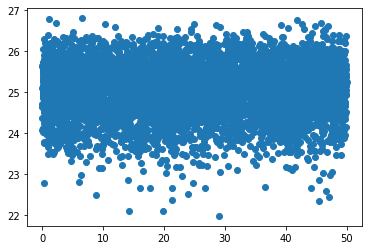

In [26]:
plt.scatter(y_test, predictions)

In [27]:
d = {'Test True Y': y_test, 'Prediction':predictions}
df= pd.DataFrame(d)
df.head()

,Test True Y,Prediction
8548,10.800982,25.073563
12029,41.022489,25.110658
3280,41.514064,23.179564
3734,20.922650,24.449028
12618,27.491980,25.295092


In [28]:
print(mean_squared_error(y_test, predictions))
print(np.sqrt(mean_squared_error(y_test, predictions)))

209.3214030252643
14.467943980582186


In [29]:
import xgboost as xgb
best_param = xgb.XGBRegressor(n_estimator=1500, max_depth=1,n_jobs=1)
best_param.fit(X_train, y_train)

C:\Users\Oyelaja Iremide\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[22:48:10] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor(max_depth=1, n_estimator=1500)

In [30]:
xgbpred = best_param.predict(X_test)

In [32]:
print(mean_squared_error(y_test,xgbpred))
print(np.sqrt(mean_squared_error(y_test,xgbpred)))

209.27726984513114
14.466418694519081
